In [32]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LSTM,Dropout,InputLayer ,GlobalMaxPooling1D, Embedding, Bidirectional, TimeDistributed, Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
import numpy as np
import pandas as pd
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from preprocess_text import remove_punctuations

In [33]:
data = pd.read_csv("data/orig_key.csv")
words = set(list(data['DATA'].values))
words.add('PADword')
n_words = len(words)
tags = list(set(data["LABEL"].values))
n_tags = len(tags)

In [34]:
class SentenceGetter(object):
    
    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, t) for w, t in zip(s["DATA"].values.tolist(),s["LABEL"].values.tolist())]
        self.grouped = self.data.groupby("PAGEID").apply(agg_func)
        self.sentences = [s for s in self.grouped]
    
    def get_next(self):
        try:
            s = self.grouped[self.n_sent]
            self.n_sent += 1
            return s
        except:
            return None

In [35]:
getter = SentenceGetter(data)
sent = getter.get_next()
#print(sent)
sentences = getter.sentences
#print(len(sentences))

In [36]:
max_len = 50
X = [[w[0]for w in s] for s in sentences]
new_X = []
for seq in X:
    new_seq = []
    for i in range(max_len):
        try:
            new_seq.append(seq[i])
        except:
            pass
    new_X.append(new_seq)
new_X[7]

['Obligated',
 'OF',
 'CONTRACT',
 'DDE',
 'DUBE',
 'Due:',
 'Net',
 'THIS',
 'TOTAL:',
 'Ending',
 'Orders',
 'No.',
 'Completed',
 'RETAINAGE',
 'RETAINED',
 'by',
 'after',
 'Payments',
 'INVOICE']

In [37]:
from keras.preprocessing.sequence import pad_sequences
tags2index = {t:i+1 for i,t in enumerate(tags)}
y = [[tags2index[w[1]] for w in s] for s in sentences]
y = pad_sequences(maxlen=max_len, sequences=y, padding="post")
y

array([[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [38]:
tags2index

{'W': 1, 'R': 2}

In [39]:
word_token = Tokenizer(num_words=20000, oov_token="UNK")
word_token.fit_on_texts(new_X)
sequence_train = word_token.texts_to_sequences(new_X)
sequence_train

[[40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
 [50, 51, 52, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26],
 [27, 28, 29, 30, 31, 32, 33, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 34],
 [35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13],
 [14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
 [30,
  31,
  32,
  33,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  34,
  35,
  36,
  37,
  38,
  39,
  40],
 [41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  34,
  35,
  36,
  37,
  38,
  39],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 1

In [40]:
X = pad_sequences(maxlen=max_len, sequences=sequence_train, padding="post")
X

array([[40, 41, 42, 43, 44, 45, 46, 47, 48, 49,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [50, 51, 52, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [27, 28, 29, 30, 31, 32, 33,  2,  3,  4,  5,  6,  7,  8,  9, 10,
        11, 12, 13, 34,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
        28, 29, 30, 31, 32, 33,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
        12, 13],
       [14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 

In [41]:
word_token.word_index
V = len(word_token.word_index)

In [42]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow_hub as hub
from keras import backend as K
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2)

In [43]:
print(X_tr.shape)
print(y_tr.shape)

(14, 50)
(14, 50)


In [44]:
#X_tr = X_tr.reshape(-1,max_len,1)
i = Input(shape=(max_len,))
#i = InputLayer(input_shape=(max_len,))
x = Embedding(V+2, 128)(i)
# x = Dropout(0.1)(x)
x = Bidirectional(LSTM(units=256,return_sequences=True))(x)
#x = LSTM(units=100,return_sequences=True,recurrent_dropout=0.1)(x)
#x = GlobalMaxPooling1D()(x)
#x = TimeDistributed(Dense(128, activation='relu'))(x)
x = TimeDistributed(Dense(3, activation='softmax'))(x)
#x = Dense(50,activation='relu')(x)
#x = Flatten()(x)
#x = Dense(3,activation='softmax')(x)
model = Model(i, x)
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=["accuracy"])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 50)                0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 50, 128)           6912      
_________________________________________________________________
bidirectional_2 (Bidirection (None, 50, 512)           788480    
_________________________________________________________________
time_distributed_2 (TimeDist (None, 50, 3)             1539      
Total params: 796,931
Trainable params: 796,931
Non-trainable params: 0
_________________________________________________________________


In [19]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, InputLayer, Bidirectional, TimeDistributed, Embedding, Activation
from keras.optimizers import Adam
 
model = Sequential()
model.add(InputLayer(input_shape=(max_len, )))
model.add(Embedding(V+2, 128))
model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(TimeDistributed(Dense(3)))
model.add(Activation('softmax'))
 
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(0.001),
              metrics=['accuracy'])
 
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 128)           6912      
_________________________________________________________________
bidirectional_1 (Bidirection (None, 50, 512)           788480    
_________________________________________________________________
time_distributed_1 (TimeDist (None, 50, 3)             1539      
_________________________________________________________________
activation_1 (Activation)    (None, 50, 3)             0         
Total params: 796,931
Trainable params: 796,931
Non-trainable params: 0
_________________________________________________________________


In [45]:
def to_categorical(sequences, categories):
    cat_sequences = []
    for s in sequences:
        cats = []
        for item in s:
            cats.append(np.zeros(categories))
            cats[-1][item] = 1.0
        cat_sequences.append(cats)
    return np.array(cat_sequences)

In [46]:
cat_train_tags_y = to_categorical(y_tr, 3)
print(y_tr[0])
print(cat_train_tags_y[0])

[1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [47]:
r = model.fit(X_tr, cat_train_tags_y, batch_size=32, epochs=100, validation_split=0.2)

Train on 11 samples, validate on 3 samples
Epoch 1/100
11/11 [==============================] - 2s 153ms/sample - loss: 1.0888 - acc: 0.7109 - val_loss: 1.0411 - val_acc: 0.5133
Epoch 2/100
11/11 [==============================] - 0s 24ms/sample - loss: 1.0265 - acc: 0.6055 - val_loss: 0.9890 - val_acc: 0.5133
Epoch 3/100
11/11 [==============================] - 0s 25ms/sample - loss: 0.9606 - acc: 0.6036 - val_loss: 0.9282 - val_acc: 0.5133
Epoch 4/100
11/11 [==============================] - 0s 26ms/sample - loss: 0.8819 - acc: 0.6036 - val_loss: 0.8550 - val_acc: 0.5133
Epoch 5/100
11/11 [==============================] - 0s 27ms/sample - loss: 0.7828 - acc: 0.6036 - val_loss: 0.7844 - val_acc: 0.5133
Epoch 6/100
11/11 [==============================] - 0s 28ms/sample - loss: 0.6759 - acc: 0.6036 - val_loss: 0.7151 - val_acc: 0.5133
Epoch 7/100
11/11 [==============================] - 0s 28ms/sample - loss: 0.5933 - acc: 0.6036 - val_loss: 0.6584 - val_acc: 0.5200
Epoch 8/100
11/11 

Epoch 62/100
11/11 [==============================] - 0s 27ms/sample - loss: 0.0571 - acc: 0.9782 - val_loss: 0.2725 - val_acc: 0.9000
Epoch 63/100
11/11 [==============================] - 0s 28ms/sample - loss: 0.0640 - acc: 0.9764 - val_loss: 0.2594 - val_acc: 0.8933
Epoch 64/100
11/11 [==============================] - 0s 28ms/sample - loss: 0.0628 - acc: 0.9727 - val_loss: 0.2112 - val_acc: 0.9000
Epoch 65/100
11/11 [==============================] - 0s 27ms/sample - loss: 0.0533 - acc: 0.9800 - val_loss: 0.1922 - val_acc: 0.9067
Epoch 66/100
11/11 [==============================] - 0s 27ms/sample - loss: 0.0527 - acc: 0.9782 - val_loss: 0.2440 - val_acc: 0.8800
Epoch 67/100
11/11 [==============================] - 0s 27ms/sample - loss: 0.0507 - acc: 0.9764 - val_loss: 0.3438 - val_acc: 0.8400
Epoch 68/100
11/11 [==============================] - 0s 27ms/sample - loss: 0.0477 - acc: 0.9818 - val_loss: 0.4168 - val_acc: 0.8067
Epoch 69/100
11/11 [==============================] - 0

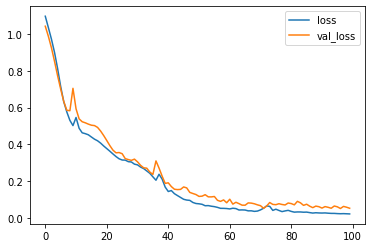

In [16]:
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

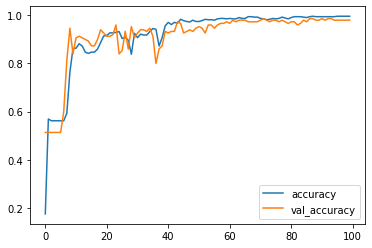

In [17]:
plt.plot(r.history["acc"], label="accuracy")
plt.plot(r.history["val_acc"], label="val_accuracy")
plt.legend()
plt.show()

In [110]:
import tensorflow as tf

In [111]:
model = tf.keras.models.load_model("models/reinforcement.h5")

In [117]:
test_text = 'Obligated OF CONTRACT DDE'
    #"Total This Invoice total this amount".split()
test_samples = [test_text.split()]
print(test_samples)

[['Obligated', 'OF', 'CONTRACT', 'DDE']]


In [118]:
test_samples_X = word_token.texts_to_sequences(test_samples)
test_samples_X = pad_sequences(test_samples_X, maxlen=max_len, padding='post')
print(test_samples_X)

[[2 3 4 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [119]:
predictions = model.predict(test_samples_X)
print(predictions, predictions.shape)

[[[3.53240245e-03 1.12114877e-01 8.84352684e-01]
  [1.79903470e-02 1.12448066e-01 8.69561553e-01]
  [1.21055506e-01 9.62120891e-02 7.82732487e-01]
  [5.03604949e-01 4.64391932e-02 4.49955851e-01]
  [9.64667976e-01 3.82237323e-03 3.15096565e-02]
  [9.93825078e-01 7.16174545e-04 5.45874983e-03]
  [9.99379516e-01 8.34350431e-05 5.37033426e-04]
  [9.99967933e-01 5.47934269e-06 2.66108200e-05]
  [9.99999046e-01 2.00322944e-07 6.72003580e-07]
  [1.00000000e+00 5.42285017e-09 1.28837225e-08]
  [1.00000000e+00 2.03617220e-10 3.95388000e-10]
  [1.00000000e+00 1.73861585e-11 3.17077684e-11]
  [1.00000000e+00 4.23900238e-12 8.56362377e-12]
  [1.00000000e+00 2.18383753e-12 5.03111788e-12]
  [1.00000000e+00 1.63399112e-12 4.07517032e-12]
  [1.00000000e+00 1.43140643e-12 3.76575464e-12]
  [1.00000000e+00 1.33345678e-12 3.66961453e-12]
  [1.00000000e+00 1.27129448e-12 3.64936553e-12]
  [1.00000000e+00 1.22076741e-12 3.65035432e-12]
  [1.00000000e+00 1.17222388e-12 3.64865560e-12]
  [1.00000000e+00 1.

In [18]:
model.save('models/reinforcement.h5')

In [31]:
(predictions[0])

array([[5.0559361e-06, 9.9617237e-01, 3.8224880e-03],
       [4.6450295e-05, 9.8388195e-01, 1.6071636e-02],
       [6.1035575e-04, 9.5535553e-01, 4.4034187e-02],
       [1.2872391e-02, 8.6324489e-01, 1.2388270e-01],
       [2.2481969e-01, 5.8491057e-01, 1.9026972e-01],
       [9.2536664e-01, 4.2520326e-02, 3.2112960e-02],
       [9.8120451e-01, 1.0622268e-02, 8.1731835e-03],
       [9.9653792e-01, 1.9453713e-03, 1.5166656e-03],
       [9.9955982e-01, 2.4814502e-04, 1.9200434e-04],
       [9.9996471e-01, 2.0295469e-05, 1.5073843e-05],
       [9.9999821e-01, 1.0269039e-06, 7.2134117e-07],
       [1.0000000e+00, 3.7244607e-08, 2.6112550e-08],
       [1.0000000e+00, 1.4934315e-09, 1.1644574e-09],
       [1.0000000e+00, 1.0533885e-10, 9.5908087e-11],
       [1.0000000e+00, 1.6698592e-11, 1.8498751e-11],
       [1.0000000e+00, 5.7996789e-12, 8.1634760e-12],
       [1.0000000e+00, 3.3307614e-12, 5.8045704e-12],
       [1.0000000e+00, 2.4453855e-12, 5.0038142e-12],
       [1.0000000e+00, 2.013

In [ ]:
np.argmax(predictions[0])

In [115]:
pred_class = {0:"Unknown",1:"Right",2:"Wrong"}
test_samples

[['Obligated',
  'OF',
  'CONTRACT',
  'DDE',
  'Order',
  'Purchase',
  'EMPLOYEE',
  'PAY',
  'SUB']]

In [120]:
for idx,test_sample in enumerate(test_samples[0]):
    print(predictions[0][idx])
    argmax_idx = np.argmax(predictions[0][idx])
    print(test_sample)
    if predictions[0][idx][argmax_idx] > 0.75:
        print(pred_class[np.argmax(predictions[0][idx])])
    else:
        print("unknown")

[0.0035324  0.11211488 0.8843527 ]
Obligated
Wrong
[0.01799035 0.11244807 0.86956155]
OF
Wrong
[0.12105551 0.09621209 0.7827325 ]
CONTRACT
Wrong
[0.50360495 0.04643919 0.44995585]
DDE
unknown
